/home/eop/.virtualenvs/dopamine/lib/python3.10/site-packages/tensorflow/python/framework/dtypes.py:246: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
2024-03-21 16:14:52.469784: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/eop/.virtualenvs/dopamine/lib/python3.10/site-packages/cv2/../../lib64:
2024-03-21 16:14:52.469873: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/eop/.virtualenvs/dopamine/lib/python3.10/site-packages/cv2/../../lib64:
2024-03-21 16:14:52.469878: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT 

Loss step 0:  125.59118
Loss step 10:  122.1805
Loss step 20:  110.98993
Loss step 30:  97.36695
Loss step 40:  78.45568
Loss step 50:  67.2789
Loss step 60:  62.011955
Loss step 70:  58.49554
Loss step 80:  57.10255
Loss step 90:  54.44588
Loss step 100:  52.361504


Array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       3.8743019e-06, 8.3723664e-04, 3.4467667e-02, 2.8222847e-01,
       4.8721910e-01, 1.8105653e-01, 1.3975710e-02, 2.1085143e-04,
       5.9604645e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00], dtype=float32)

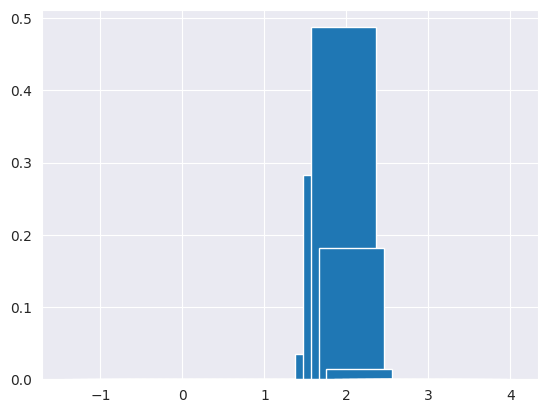

In [1]:
import sys

import jax
import matplotlib.pyplot as plt

sys.path.insert(1, '/home/eop/code/dopamine/dopamine/jax/agents/quantile')
from test_iqn_crossent import *

y_example = 2
target_probs = hl_gauss_encode(y_example)

plt.bar(support[:-1], target_probs)
target_probs

In [2]:
convert_prob_to_value(target_probs)

Array(2.0000005, dtype=float32)

In [3]:
num_test_quant = 10 
x_batched = jnp.linspace(jnp.min(x_raw), jnp.max(x_raw), 100)[:, None]
n_sines = 3
t_sines = [jnp.sin(x_batched * i) for i in range(1, n_sines+1)]
t_cosines = [jnp.cos(x_batched * i) for i in range(1, n_sines+1)]
x_batched = jnp.stack([x_batched, *t_sines, *t_cosines], axis=-1)

def online(state, key):
    return network_crossent.apply(crossent_params, state, num_quantiles=num_test_quant,
                             rng=key)

batched_rng = jnp.stack(jax.random.split(jax.random.key(0), num=x_batched.shape[0]))

model_output = jax.vmap(online)(x_batched, batched_rng)
quantile_values = model_output.quantile_values
quantile_values = convert_prob_to_value(jax.nn.softmax(quantile_values))
quantiles = model_output.quantiles

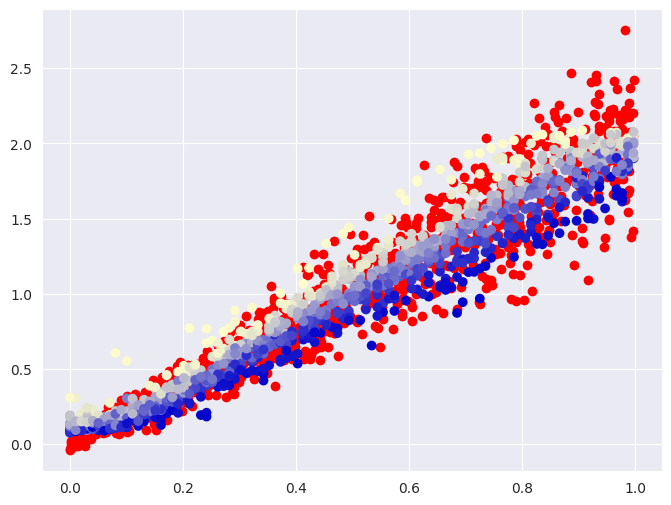

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x_raw, y, c='r')

for i in range(num_test_quant):
    y_pred = quantile_values[:, i, :].squeeze()
    q = quantiles[:, i, 0].tolist()
    col = list(zip(q, q, jnp.ones_like(quantiles[:, i, 0]) * 0.8))
    ax.scatter(x_batched[:, 0, 0], y_pred, c=col)

In [5]:
crossent_params

{'params': {'Dense_0': {'bias': Array([ 0.07975613,  0.09584101,  0.16876175,  0.        ,  0.        ,
           0.23346508, -0.0180154 ,  0.        ,  0.01765866,  0.11516182,
           0.23347129,  0.        ,  0.22678731,  0.        ,  0.1266019 ,
           0.13225609,  0.        ,  0.08455375,  0.1138536 ,  0.        ,
           0.10078856,  0.09775201,  0.        , -0.0395135 ,  0.23782448,
           0.07440361,  0.20318474,  0.16350329,  0.11771131,  0.18106508,
           0.20894589,  0.        ], dtype=float32),
   'kernel': Array([[ 0.36548212,  0.5914624 , -0.30949208, -0.02942981, -0.20302145,
            0.46502984, -0.31064922,  0.30368936,  0.30778804,  0.29642507,
            0.16144603,  0.17037436,  0.08124854,  0.1960016 ,  0.23296908,
           -0.09253004,  0.25993964,  0.09660307,  0.2721921 , -0.22853734,
            0.52109253,  0.56064403, -0.24290659, -0.4550161 ,  0.32876185,
            0.51851577,  0.5164168 ,  0.07736904,  0.24429308,  0.42350677,
  

Array(0.97087944, dtype=float32)

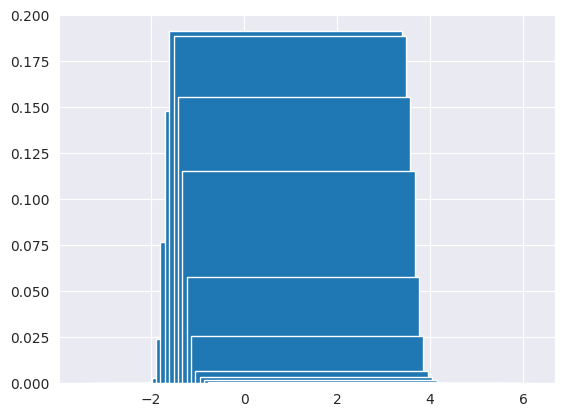

In [6]:
probs = jax.nn.softmax(model_output.quantile_values[50, 4, 0])
plt.bar(x=centers, height=probs, width=5)
convert_prob_to_value(probs)